# Vector Chirped Z-transform (VCZT)


In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from diffractio import degrees, mm, um
from diffractio import np

from diffractio.scalar_fields_XY import Scalar_field_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

In [27]:
size = 25*um
x0 = np.linspace(-size/2, size/2, 512)
y0 = np.linspace(-size/2, size/2, 256)

focal = 16*um
wavelength = 0.6328*um

In [28]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0*um, 0*um),
              w0=(32*um, 32*um),
              z0=0*um,
              A=1,
              theta=0*degrees,
              phi=0*degrees)
#u0.plane_wave()

In [29]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens_cylindrical(x0=0,focal=focal, angle=90*degrees)
t.lens(r0=(0.,0.),focal=focal)


In [30]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u1, v=(1, 1j))
EM1.pupil()

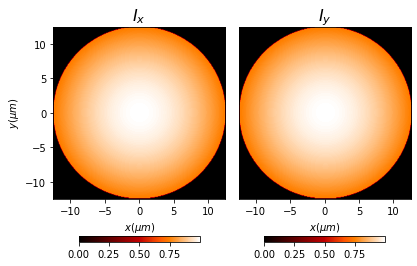

In [31]:
EM1.draw('intensities', logarithm=0)

## to value


In [32]:
x_out = 0.
y_out = 0.
z = focal

In [33]:
%%time
EM2_1D=EM1.VCZT(z, x_out, y_out, verbose=True)
print(EM2_1D)


((-2.9142445706507045-12.016921496269976j), (12.016921496269976-2.9142445706507045j), (-4.39648317751562e-14-7.771561172376096e-15j))
CPU times: user 156 ms, sys: 14.8 ms, total: 171 ms
Wall time: 170 ms


## to x_field


In [34]:
size_out = 16*um
x_out = np.linspace(-size_out/2, size_out/2, 512)
y_out = 0.
z = focal

CPU times: user 608 ms, sys: 239 ms, total: 847 ms
Wall time: 440 ms


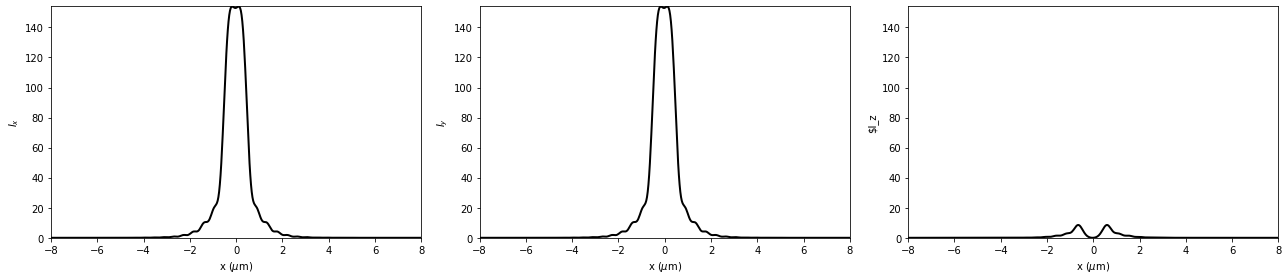

In [35]:
%%time
EM2_1D=EM1.VCZT(z, x_out, y_out)
EM2_1D.draw('intensities');

## to z_field


In [36]:
x_out = 0.
y_out = 0.
z = np.linspace(focal - 10*um, focal + 4*um, 64)

In [37]:
%%time
EM2=EM1.VCZT(z, x_out, y_out, verbose=False);


CPU times: user 9.04 s, sys: 1.45 s, total: 10.5 s
Wall time: 10.5 s


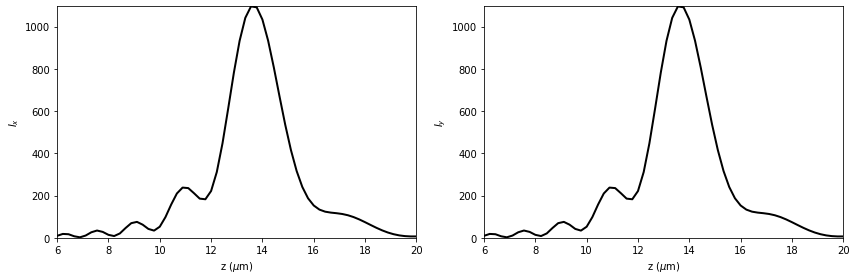

In [38]:
EM2.draw('intensities')

## to XZ_field


In [39]:
size_out = 12*um
x_out = np.linspace(-size_out/2, size_out/2, 128)
y_out = 0.
z = np.linspace(focal - 2*um - 6*um, focal - 2*um + 6*um, 64)

In [40]:
%%time
EM2=EM1.VCZT(z, x_out, y_out)

CPU times: user 7.39 s, sys: 13.8 ms, total: 7.4 s
Wall time: 7.46 s


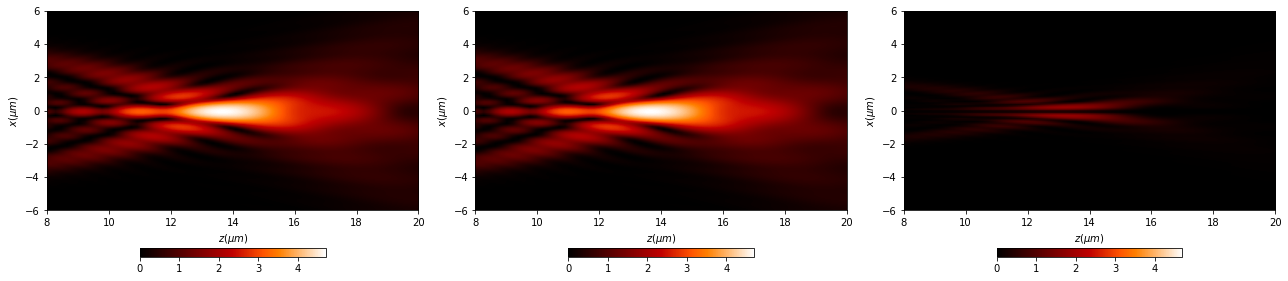

In [41]:
EM2.draw('intensities', logarithm=1e-1)

## to XY_field


In [42]:
size_out = 4*um
x_out = np.linspace(-size_out/2, size_out/2, 512)
y_out = np.linspace(-size_out/2, size_out/2, 512)
z = focal - 3*um

In [43]:
%%time
EM2=EM1.VCZT(z, x_out, y_out)


CPU times: user 398 ms, sys: 58 ms, total: 456 ms
Wall time: 454 ms


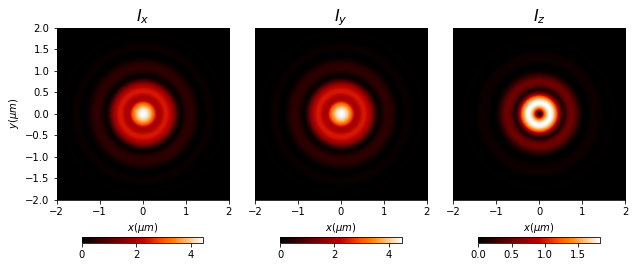

In [44]:
EM2.draw('intensities', logarithm=1e-1)

## to XYZ_field


In [45]:
size_out = 6*um
x_out = np.linspace(-size_out/2, size_out/2, 32)
y_out = np.linspace(-size_out/2, size_out/2, 64)
z = np.linspace(focal - 2*um - 6*um, focal - 2*um + 6*um, 16)

In [46]:
%%time
EM3=EM1.VCZT(z, x_out, y_out)

CPU times: user 1.97 s, sys: 0 ns, total: 1.97 s
Wall time: 1.98 s


<Figure size 432x288 with 0 Axes>

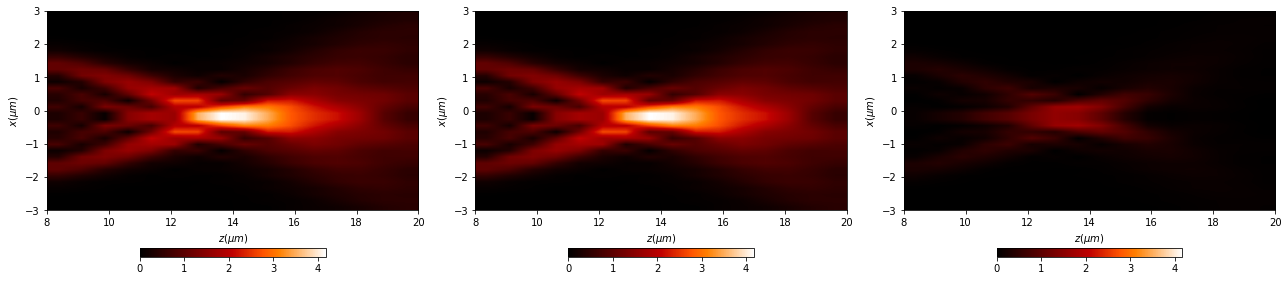

In [47]:
EM3.draw_XZ('intensities', y0=0, logarithm=1e-1)

<Figure size 432x288 with 0 Axes>

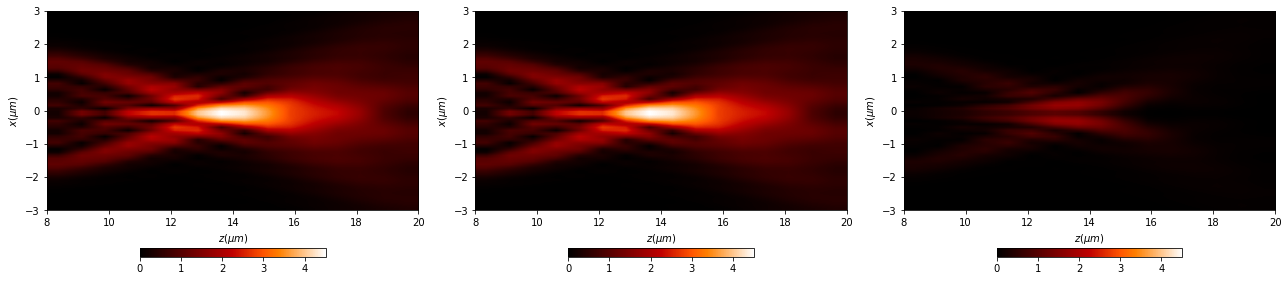

In [48]:
EM3.draw_YZ('intensities', x0=0, logarithm=1e-1)